<h1><center>EARTH 468: HW02</center></h1>  

<h6>Submitted by: Prithvi Thakur</h6>
<h6>Email: prith@umich.edu</h6>

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import functools
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

<h3>Problem 1: avg size of US wildfires </h3>

In [2]:
# Import Data
fire_data = pd.read_csv("NIFC_FireStats.csv")

name = fire_data["year"]
state = fire_data["name"]
year = fire_data["state"]
area = fire_data["area (acres)"]

<h3>(a) Separate pre- and post-2006 fires</h3>

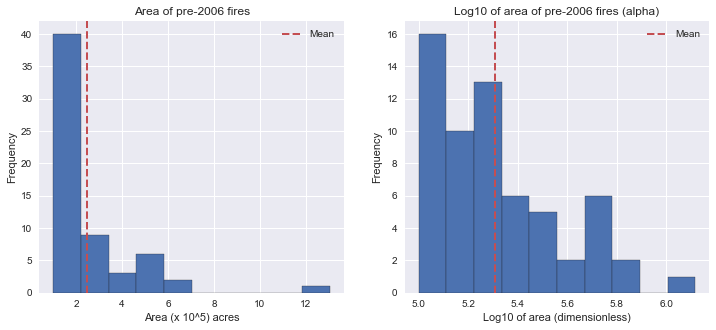

In [3]:
# Index 2006 = The first instance of 2006
idx_2006 = np.where(year==2006)[0][0]

# Pre-2006 fire area
area_pre2006 = np.array(area[0:idx_2006])

# Normalize pre-2006 fire area
area_pre2006_norm = area_pre2006/100000

# Log10 of pre-2006 area
alpha = np.log10(area_pre2006)


##################
# Plot histogram #
##################

# Initialize figure
fig = plt.figure(figsize=(12,5))

# Initialize subplots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot pre-2006 area histogram
ax1.hist(area_pre2006_norm, bins=10, label='_nolegend_')

# Customize plot
ax1.axvline(area_pre2006_norm.mean(), color='r', linestyle='dashed',\
            linewidth=2, label="Mean")
ax1.set_title("Area of pre-2006 fires")
ax1.set_xlabel("Area (x 10^5) acres")
ax1.set_ylabel("Frequency")
ax1.legend()
# Plot log10 pre-2006 area histogram
ax2.hist(alpha, bins=10, label='_nolegend_')

# Customise plot
ax2.axvline(alpha.mean(), color='r', linestyle='dashed',\
            linewidth=2, label="Mean")
ax2.set_title("Log10 of area of pre-2006 fires (alpha)")
ax2.set_xlabel("Log10 of area (dimensionless)")
ax2.set_ylabel("Frequency")
ax2.legend()
plt.show()

<h3>(b) Mean, sample std, and standard error of alpha</h3>

In [4]:
# Mean area pre-2006 in log space
alpha_mean = np.mean(alpha)
print("The mean of alpha:                      %.3f" \
      %alpha_mean)

# Sample standard deviation of alpha
alpha_std = np.std(alpha)
print("The sample standard deviation of alpha: %.3f" \
      %alpha_std)

# Standard error of alpha
alpha_sem = stats.sem(alpha)
print("The standard error of alpha:            %.3f" \
      %alpha_sem)

The mean of alpha:                      5.310
The sample standard deviation of alpha: 0.248
The standard error of alpha:            0.032


Sample standard deviation represents the dispersion of each member of the sample from its sample mean. 

The standard error represents how far is the sample mean from the population mean. A very low standard error implies that our sample is representative of the population.

<h3>(c) Histogram and statistics of beta</h3>

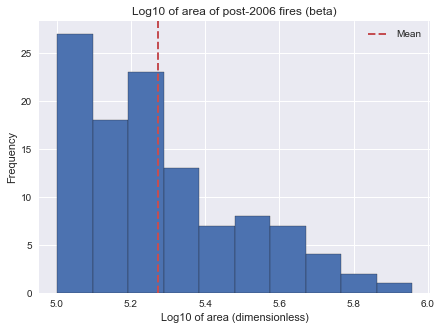

The mean of beta:                      5.272
The sample standard deviation of beta: 0.219
The standard error of beta:            0.021


In [5]:
# Post-2006 fire area
area_post2006 = np.array(area[idx_2006:])
beta = np.log10(area_post2006)

##################
# Plot histogram #
##################

# Initialize figure
fig = plt.figure(figsize=(7,5))

# Initialize subplots
ax1 = fig.add_subplot(111)

# Plot log10 of post-2006 area histogram
ax1.hist(beta, bins=10, label='_nolegend_')

# Customize plot
ax1.axvline(beta.mean(), color='r', linestyle='dashed', linewidth=2,\
           label="Mean")
ax1.set_title("Log10 of area of post-2006 fires (beta)")
ax1.set_xlabel("Log10 of area (dimensionless)")
ax1.set_ylabel("Frequency")
ax1.legend()
plt.show()


##############
# Statistics #
##############
# Mean area post-2006 in log space
beta_mean = np.mean(beta)
print("The mean of beta:                      %.3f" \
      %beta_mean)

# Sample standard deviation of beta
beta_std = np.std(beta)
print("The sample standard deviation of beta: %.3f" \
      %beta_std)

# Standard error of beta
beta_sem = stats.sem(beta)
print("The standard error of beta:            %.3f" \
      %beta_sem)

The distribution in the histograms is similar but post-2006 fires have occured with an increased frequency. The statistic variables of both pre-2006 and post-2006 are very similar. The lower mean and standard deviation implies that smaller area fires have been more prevalent after 2006. Since there is an increased frequency in fires, therefore the standard error of beta is less than alpha.

<h3>(d) Compare frequency of beta within alpha std</h3>

In [6]:
# Frequency of beta area within:

# 1 std of alpha = 5.062 to 5.558
freq1 = sum(1 for i in range(len(beta)) if 5.062<= beta[i] <=5.558)
    
# 2 std of alpha = 4.814 to 5.806
freq2 = sum(1 for i in range(len(beta)) if 4.814<= beta[i] <=5.806)
    
# 3 std of alpha = 4.566 to 6.054
freq3 = sum(1 for i in range(len(beta)) if 4.566<= beta[i] <=6.054)

# Total frequency
total_freq = len(beta)

# Percentage values
print("The percentage of beta within 1 alpha std = %.3f"\
      %(freq1*100/total_freq))
print("The percentage of beta within 2 alpha std = %.3f"\
      %(freq2*100/total_freq))
print("The percentage of beta within 3 alpha std = %.3f"\
      %(freq3*100/total_freq))

The percentage of beta within 1 alpha std = 67.273
The percentage of beta within 2 alpha std = 98.182
The percentage of beta within 3 alpha std = 100.000


The percentage of beta within 1 alpha standard deviation is less than the standard 68%, but the percentages within 2 and 3 standard deviations are more than the standard gaussin percentages of 95 and 99.7.

I would expect this, since the cumulative frequency of alpha is lower, therefore its gaussian has more spread.

<h3>(e) Plot gaussian pdf</h3>

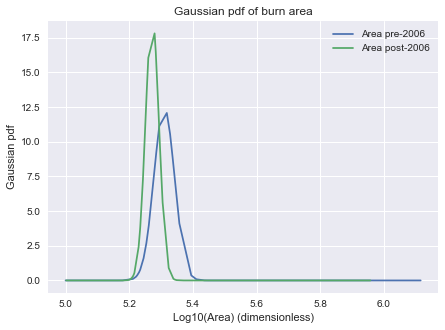

In [18]:
# Mean and sem
mean_pre2006 = np.mean(area_pre2006)
sem_pre2006 = stats.sem(area_pre2006)

mean_post2006 = np.mean(area_post2006)
sem_post2006 = stats.sem(area_post2006)

# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax1 = fig.add_subplot(111)

# Gaussian pdf

x1 = np.sort(alpha)
y1 = stats.norm.pdf(x1, alpha_mean, alpha_sem)

x2 = np.sort(beta)
y2 = stats.norm.pdf(x2, beta_mean, beta_sem)

ax1.plot(x1, y1, label='Area pre-2006')
ax1.plot(x2, y2, label='Area post-2006')
ax1.set_xlabel("Log10(Area) (dimensionless)")
ax1.set_ylabel("Gaussian pdf")
ax1.set_title("Gaussian pdf of burn area")

ax1.legend()
plt.show()

In [8]:
# 95% confidence interval
pre2006_95 = stats.norm.interval(0.95, loc = alpha_mean, scale = alpha_sem)
post2006_95 = stats.norm.interval(0.95, loc = beta_mean, scale = beta_sem)

print("95 percent confidence interval of avg burn area pre-2006 \
\n= %.3f to %.3f acres" %(np.power(10, pre2006_95[0]), np.power(10, pre2006_95[1])))

print("\n95 percent confidence interval of avg burn area post-2006 \
\n= %.3f to %.3f acres" %(np.power(10, post2006_95[0]), np.power(10, post2006_95[1])))


95 percent confidence interval of avg burn area pre-2006 
= 176694.716 to 235805.494 acres

95 percent confidence interval of avg burn area post-2006 
= 170214.784 to 205734.478 acres


In [17]:
# Avg fire size post 2006 in log space
print("The avg fire size post 2006 in log space = %.3f" %beta_mean)

The avg fire size post 2006 in log space = 5.272


The avg fire size post 2006 in log space is <b>not statistically consistent</b> with the average size and standard error of the part (b) (5.310 +/- 0.032) since it lies outside the range of one standard error.

<h3>Problem 2: BMI vs point spread</h3>

In [10]:
# Load data
football_data = pd.read_csv("2013_FootballRoster_BMI.csv")

# BMI class interval
bmi = np.array(football_data["BMI"])

<h3>(a) Avg BMI of each team</h3>

In [11]:
df = football_data

df2 = pd.DataFrame()

for column in df:
    temp_bmi = np.average(df["BMI"], weights = df[column])
    df2[column] = [np.round(temp_bmi,3)]

print("The weighted average BMI of each state (In kg/m2) = ")
print(df2.drop("BMI", axis=1).transpose())


The weighted average BMI of each state (In kg/m2) = 
                   0
Michigan      29.869
Iowa          29.897
MichiganSt    30.036
Minnesota     29.525
Nebraska      29.897
Northwestern  28.374
NotreDame     30.341
OhioSt        30.208
PennSt        29.626


<h3>(b) Point spread vs average BMI</h3>

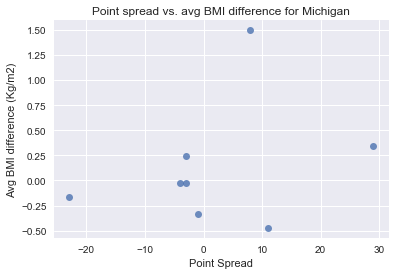

In [12]:
point_spread = np.array([-3, -23, 29, -4, 8, 11, -1, -3])

# Avg BMI array
avg_bmi_all = np.array(df2.drop("BMI", axis=1).transpose())[:,0]

# Michigan difference in avg BMI
delta_bmi = avg_bmi_all[0] - avg_bmi_all[1:] 


# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot
sns.regplot(point_spread, delta_bmi, fit_reg=False)

# Customize plot
ax.set_xlabel("Point Spread")
ax.set_ylabel("Avg BMI difference (Kg/m2)")
ax.set_title("Point spread vs. avg BMI difference for Michigan")

plt.show()

<h3>(c) Correlation coefficient between $\delta_{BMI}$ and point spread</h3>

In [13]:
corr_coef = np.corrcoef(delta_bmi, point_spread)
print("The correlation coefficient is: ", corr_coef[1,0])

The correlation coefficient is:  0.288530337858


<h3>(d) t-test</h3>

In [14]:
# Compute the t statistic

N = 8 #data pairs
rho = corr_coef[1,0] #correlation coefficient

t_value = rho*np.sqrt(N-2)/np.sqrt(1-(rho**2))

print("The t-statistic of the above data is: %.3f" %t_value)
print("The degress of freedom is: ", N-2)

The t-statistic of the above data is: 0.738
The degress of freedom is:  6


Since the absolute value of t-statistic is 0.738, which is much lower than the standard 2.45 for 6 degrees of freedom at 95% confidence interval, we <b>cannot reject the null hypothesis</b> that the pairwise difference between the delta bmi and point spread is equal.